In [1]:
from fastai.tabular import *

In [2]:
path = Path('data/Kaggle/Titanic')

In [4]:
df_train = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')

In [5]:
df_test["Fare"] = df_test["Fare"].fillna(value =0)

In [6]:
dep_var = 'Survived'
cat_names = ['Pclass','Sex', 'Ticket', 'Cabin', 'Embarked']
cont_names = ['Age', 'SibSp','Parch', 'Fare']
procs = [FillMissing, Categorify, Normalize]

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test = TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [9]:
data = (TabularList.from_df(df_train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                            .split_by_idx(list(range(0,200)))
                            .label_from_df(cols=dep_var)
                            .add_test(test, label=0)
                            .databunch())

In [10]:
data.show_batch(rows=10)

Pclass,Sex,Ticket,Cabin,Embarked,Age_na,Age,SibSp,Parch,Fare,target
3,male,347089,#na#,S,False,-0.2303,-0.4610,-0.4658,-0.5034,1
3,female,349244,#na#,S,False,0.0822,-0.4610,-0.4658,-0.4711,1
3,male,367655,#na#,Q,True,-0.0741,-0.4610,-0.4658,-0.4892,0
2,male,28213,#na#,S,False,0.7071,-0.4610,-0.4658,-0.3894,0
3,female,2691,#na#,C,False,1.1758,-0.4610,0.8064,-0.3618,0
1,female,113806,E8,S,False,0.2384,0.5043,-0.4658,0.3700,1
2,female,C.A. 31921,#na#,S,False,-1.7146,-0.4610,2.0785,-0.1384,1
1,male,113503,C82,C,False,-0.2303,-0.4610,2.0785,3.3697,0
3,male,CA 2144,#na#,S,False,-1.2459,4.3658,2.0785,0.2526,0
2,male,C.A./SOTON 34068,#na#,S,False,-0.1522,-0.4610,-0.4658,-0.4367,0


In [11]:
learn = tabular_learner(data, layers=[500,200,15], metrics=accuracy)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


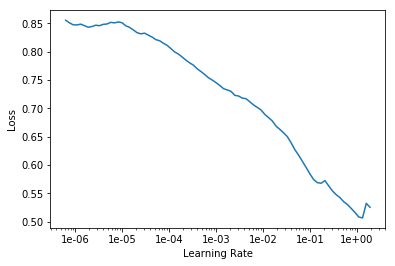

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.743630,0.773936,0.345000,00:00
1,0.670777,0.778110,0.345000,00:00
2,0.644701,0.774054,0.360000,00:00
3,0.609395,0.739077,0.405000,00:00
4,0.571658,0.713244,0.620000,00:00


In [15]:
learn.fit_one_cycle(5, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.422774,0.737671,0.515000,00:00
1,0.312558,0.759888,0.815000,00:00
2,0.240755,0.624558,0.835000,00:00
3,0.187408,0.580846,0.835000,00:00
4,0.148989,0.548642,0.835000,00:00


In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


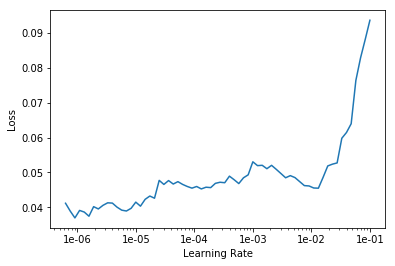

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.041550,0.563754,0.830000,00:00
1,0.037652,0.660897,0.835000,00:00
2,0.037523,0.731051,0.820000,00:00
3,0.036110,0.769378,0.825000,00:00
4,0.031221,0.739654,0.825000,00:00


In [ ]:
learn.load('stage-1')

In [25]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [42]:
test_id=df_test['PassengerId']

In [43]:
submission = pd.DataFrame({'PassengerId': test_id, 'Survived': labels})
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
